## Cleaning and Merging

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

In [2]:
# Loading in dataframes
df_i = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv')
df_i.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


In [3]:
df_p = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv')
df_p.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [4]:
# Begin cleaning df_i
df_i['Hero|Publisher'].str.split('|', expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [5]:
df_i[['Hero', 'Publisher']] = df_i['Hero|Publisher'].str.split('|', expand=True)
df_i.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
df_i = df_i.drop(columns='Hero|Publisher')
df_i.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
df_i['Measurements'].str.split(',', expand=True)

,0,1
0,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,{'Height': '191.0 cm','Weight': '65.0 kg'}
2,{'Height': '185.0 cm','Weight': '90.0 kg'}
3,{'Height': '203.0 cm','Weight': '441.0 kg'}
4,{'Height': '193.0 cm','Weight': '122.0 kg'}
...,...,...
458,{'Height': '183.0 cm','Weight': '83.0 kg'}
459,{'Height': '165.0 cm','Weight': '52.0 kg'}
460,{'Height': '66.0 cm','Weight': '17.0 kg'}
461,{'Height': '170.0 cm','Weight': '57.0 kg'}


In [8]:
df_i[['Height (cm)', 'Weight (kg)']] = df_i['Measurements'].str.split(',', expand=True)
df_i.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,{'Height': '191.0 cm','Weight': '65.0 kg'}


In [9]:
df_i = df_i.drop(columns='Measurements')
df_i.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,{'Height': '191.0 cm','Weight': '65.0 kg'}


In [10]:
# From (https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string)
df_i['Height (cm)'] = df_i['Height (cm)'].str.extract('(\d+)')
df_i.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,'Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,'Weight': '65.0 kg'}


In [11]:
df_i['Weight (kg)'] = df_i['Weight (kg)'].str.extract('(\d+)')
df_i.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65


In [12]:
df_i['Height (cm)'] = pd.to_numeric(df_i['Height (cm)'])

In [13]:
df_i['Weight (kg)'] = pd.to_numeric(df_i['Weight (kg)'])

In [14]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       463 non-null    object
 1   Race         463 non-null    object
 2   Alignment    463 non-null    object
 3   Hair color   463 non-null    object
 4   Eye color    463 non-null    object
 5   Skin color   463 non-null    object
 6   Hero         463 non-null    object
 7   Publisher    463 non-null    object
 8   Height (cm)  463 non-null    int64 
 9   Weight (kg)  463 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 36.3+ KB


In [15]:
# Begin cleading df_p
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [16]:
df_p['Hero'] = df_p['hero_names']
df_p.head(2)

,hero_names,Powers,Hero
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",3-D Man
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb


In [17]:
df_p = df_p.drop(columns='hero_names')
df_p.head(2)

,Powers,Hero
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man
1,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb


In [18]:
# Beginning to OHE powers
df_p['Powers'].head(2)

0           Agility,Super Strength,Stamina,Super Speed
1    Accelerated Healing,Durability,Longevity,Super...
Name: Powers, dtype: object

In [19]:
df_p.loc[0, 'Powers']

'Agility,Super Strength,Stamina,Super Speed'

In [20]:
df_p['powers_split'] = df_p['Powers'].str.split(',', expand=False)
df_p['powers_split']

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: powers_split, Length: 667, dtype: object

In [21]:
exploded = df_p.explode('powers_split')
exploded

,Powers,Hero,powers_split
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,Agility
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,Super Strength
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,Stamina
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,Super Speed
1,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb,Accelerated Healing
...,...,...,...
665,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Zatanna,Weather Control
666,"Super Speed,Intangibility,Time Travel,Time Man...",Zoom,Super Speed
666,"Super Speed,Intangibility,Time Travel,Time Man...",Zoom,Intangibility
666,"Super Speed,Intangibility,Time Travel,Time Man...",Zoom,Time Travel


In [22]:
## saving the unique values from the exploded column
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [23]:
for col in cols_to_make:
    df_p[col] = df_p['Powers'].str.contains(col)
df_p.head()



/Users/Londo/opt/anaconda3/envs/dojo-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,Powers,Hero,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,"Agility,Accelerated Healing,Cold Resistance,Du...",Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Lantern Power Ring,Abin Sur,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Accelerated Healing,Intelligence,Super Strengt...",Abomination,"[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
## Merging with the same column name
df = pd.merge(df_i,df_p, on='Hero')
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Compare the average weight of super powers who have Super Speed to those who do not.

In [26]:
df.groupby('Super Speed')['Weight (kg)'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight (kg), dtype: float64

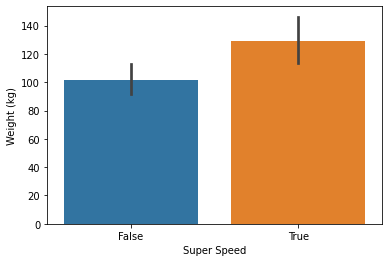

In [27]:
sns.barplot(data=df, x='Super Speed', y='Weight (kg)')

In [ ]:
# What is the average height of heroes for each publisher?

In [28]:
df.groupby('Publisher')['Height (cm)'].mean()

Publisher
DC Comics            181.920290
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.545455
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height (cm), dtype: float64